In [4]:
import psutil
import pandas as pd
import datetime
import time
import random
import threading
import subprocess
import re

# Settings
duration_minutes = 240  # 5 hours
sampling_rate_hz = 0.1  # 1 sample every 10 seconds
num_samples = int(duration_minutes * 60 * sampling_rate_hz)

# Lists for data
data = {
    "timestamp": [],
    "cpu_temperature": [],
    "cpu_usage": [],
    "cpu_load": [],
    "memory_usage": [],
    "battery_level": [],
    "fan_speed": []
}

# Function to fetch iStats data
def get_istats_data():
    cpu_temp = None
    fan_speed = None
    try:
        start = time.time()  # Start iStats
        
        istats_output = subprocess.run(["istats"], stdout=subprocess.PIPE, text=True)
        elapsed = time.time() - start
        print(f"[INFO] iStats command executed in {elapsed:.2f} seconds")

        for line in istats_output.stdout.split("\n"):
            if "CPU temp" in line:
                temp_match = re.search(r"(\d+\.\d+)", line)
                if temp_match:
                    cpu_temp = float(temp_match.group(1))
            if "Fan speed" in line:
                fan_speed_match = re.search(r"(\d+)", line)
                if fan_speed_match:
                    fan_speed = int(fan_speed_match.group(1))
    except Exception as e:
        print(f"Error fetching iStats data: {e}")
    return cpu_temp, fan_speed

# Data collection loop
def collect_data():
    start_time = time.time()
    print(f"[INFO] Data collection started at {datetime.datetime.now()}")
    for i in range(num_samples):
        iteration_start = time.time()  # Start iteration
        try:
            # Current time
            current_time = datetime.datetime.now()
            data["timestamp"].append(current_time)

            # CPU usage
            cpu_usage_start = time.time()
            cpu_usage = psutil.cpu_percent(interval=None)
            cpu_usage_elapsed = time.time() - cpu_usage_start
            print(f"[INFO] CPU usage collected in {cpu_usage_elapsed:.2f} seconds")
            data["cpu_usage"].append(cpu_usage)

            # CPU load
            cpu_load_start = time.time()
            cpu_load = psutil.getloadavg()[0]
            cpu_load_elapsed = time.time() - cpu_load_start
            print(f"[INFO] CPU load collected in {cpu_load_elapsed:.2f} seconds")
            data["cpu_load"].append(cpu_load)

            # Memory usage
            memory_usage_start = time.time()
            memory_usage = psutil.virtual_memory().percent
            memory_usage_elapsed = time.time() - memory_usage_start
            print(f"[INFO] Memory usage collected in {memory_usage_elapsed:.2f} seconds")
            data["memory_usage"].append(memory_usage)

            # Battery level
            battery_start = time.time()
            battery = psutil.sensors_battery()
            battery_level = battery.percent if battery else None
            battery_elapsed = time.time() - battery_start
            print(f"[INFO] Battery level collected in {battery_elapsed:.2f} seconds")
            data["battery_level"].append(battery_level)

            # Fetch iStats data 
            if i % int(sampling_rate_hz * 60) == 0:
                istats_start = time.time()
                cpu_temp, fan_speed = get_istats_data()
                istats_elapsed = time.time() - istats_start
                print(f"[INFO] iStats data fetched in {istats_elapsed:.2f} seconds")
                data["cpu_temperature"].append(cpu_temp)
                data["fan_speed"].append(fan_speed)
            else:
                data["cpu_temperature"].append(None)
                data["fan_speed"].append(None)

            # Anomalies
            if random.random() < 0.01:
                data["cpu_usage"][-1] = random.uniform(90, 100)
                print("[WARNING] Anomaly: High CPU usage simulated")
            if random.random() < 0.01:
                data["cpu_temperature"][-1] = random.uniform(90, 105)
                print("[WARNING] Anomaly: High CPU temperature simulated")
            if random.random() < 0.01:
                data["memory_usage"][-1] = random.uniform(95, 100)
                print("[WARNING] Anomaly: High memory usage simulated")
            if random.random() < 0.01:
                data["battery_level"][-1] = random.uniform(0, 10)
                print("[WARNING] Anomaly: Low battery level simulated")
            if random.random() < 0.01:
                data["fan_speed"][-1] = random.randint(4000, 6000)
                print("[WARNING] Anomaly: High fan speed simulated")

            # Sleep to match sampling rate
            sleep_start = time.time()
            time.sleep(1 / sampling_rate_hz)
            sleep_elapsed = time.time() - sleep_start
            print(f"[INFO] Sleep completed in {sleep_elapsed:.2f} seconds")

        except Exception as e:
            print(f"[ERROR] Error during data collection: {e}")
            for key in data.keys():
                if key != "timestamp":
                    data[key].append(None)

        # Iteration time
        iteration_elapsed = time.time() - iteration_start
        print(f"[INFO] Iteration {i + 1}/{num_samples} completed in {iteration_elapsed:.2f} seconds")

    # Total execution time
    total_elapsed = time.time() - start_time
    print(f"[INFO] Data collection completed in {total_elapsed:.2f} seconds")

# Data collection
collect_data()

# Save to CSV
save_start = time.time()
df = pd.DataFrame(data)
df.to_csv("system_stats.csv", index=False)
save_elapsed = time.time() - save_start
print(f"[INFO] Data saved to 'system_stats.csv' in {save_elapsed:.2f} seconds")

# File size estimation
print(f"[INFO] Data collected: {len(df)} rows")

[INFO] Data collection started at 2024-11-30 10:14:28.001931
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.27 seconds
[INFO] iStats data fetched in 0.27 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1/1440 completed in 10.28 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 2/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 3/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 29/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 30/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 31/1440 completed in 10.26 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 32/1440 completed in 10.01 seconds
[INFO] C

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 58/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 59/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 60/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 61/1440 completed in 10.26 seconds
[INFO] C

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 87/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 88/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 89/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 90/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 116/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 117/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 118/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 119/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 145/1440 completed in 10.26 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 146/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 147/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 148/1440 completed in 10.01 seconds
[INF

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 174/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 175/1440 completed in 10.27 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 176/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 177/1440 completed in 10.01 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 203/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 204/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.27 seconds
[INFO] iStats data fetched in 0.27 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 205/1440 completed in 10.28 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 206/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 232/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 233/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 234/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.44 seconds
[INFO] iStats data fetched in 0.44 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 235/1440 completed in 10.44 seconds
[INF

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 261/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 262/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 263/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 264/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 290/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 291/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 292/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 293/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] iStats command executed in 0.47 seconds
[INFO] iStats data fetched in 0.47 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 319/1440 completed in 10.47 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 320/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 321/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 322/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 348/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.37 seconds
[INFO] iStats data fetched in 0.37 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 349/1440 completed in 10.38 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[WARNING] Anomaly: High CPU usage simulated
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 350/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iterat

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 377/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 378/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.28 seconds
[INFO] iStats data fetched in 0.28 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 379/1440 completed in 10.29 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 380/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 406/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 407/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 408/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.39 seconds
[INFO] iStats data fetched in 0.39 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 409/1440 completed in 10.39 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 435/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.06 seconds
[INFO] Iteration 436/1440 completed in 10.06 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 437/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 438/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 463/1440 completed in 10.30 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 464/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 465/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 466/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 492/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 493/1440 completed in 10.27 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 494/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 495/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 521/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 522/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.28 seconds
[INFO] iStats data fetched in 0.28 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 523/1440 completed in 10.29 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 524/1440 completed in 10.01 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 550/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 551/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 552/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.29 seconds
[INFO] iStats data fetched in 0.29 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 553/1440 completed in 10.29 seconds
[INF

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 578/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 579/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 580/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 581/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] iStats command executed in 0.28 seconds
[INFO] iStats data fetched in 0.28 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 607/1440 completed in 10.28 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 608/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 609/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 610/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 636/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.50 seconds
[INFO] iStats data fetched in 0.50 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 637/1440 completed in 10.51 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[WARNING] Anomaly: High CPU temperature simulated
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 638/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] 

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 665/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 666/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[WARNING] Anomaly: High CPU usage simulated
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 667/1440 completed in 10.27 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iterat

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 694/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 695/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 696/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 697/1440 completed in 10.27 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 723/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 724/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 725/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 726/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Me

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 752/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[WARNING] Anomaly: High CPU usage simulated
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 753/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 754/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 755/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] 

[INFO] iStats command executed in 0.49 seconds
[INFO] iStats data fetched in 0.49 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 781/1440 completed in 10.50 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 782/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 783/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 784/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 810/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.30 seconds
[INFO] iStats data fetched in 0.30 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 811/1440 completed in 10.31 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 812/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 813/1440 completed in 10.01 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 839/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 840/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.30 seconds
[INFO] iStats data fetched in 0.30 seconds
[WARNING] Anomaly: High CPU usage simulated
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 841/1440 completed in 10.31 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iterat

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 868/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 869/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 870/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 871/1440 completed in 10.27 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 897/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[WARNING] Anomaly: High memory usage simulated
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 898/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 899/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 900/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INF

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 926/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 927/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[WARNING] Anomaly: High CPU usage simulated
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 928/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 929/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] 

[INFO] iStats command executed in 0.26 seconds
[INFO] iStats data fetched in 0.26 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 955/1440 completed in 10.27 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 956/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 957/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 958/1440 completed in 10.00 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 984/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.41 seconds
[INFO] iStats data fetched in 0.41 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 985/1440 completed in 10.41 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 986/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 987/1440 completed in 10.01 seconds
[INF

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1013/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1014/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.48 seconds
[INFO] iStats data fetched in 0.48 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1015/1440 completed in 10.49 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1016/1440 completed in 10.00 seconds


[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1042/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[WARNING] Anomaly: High memory usage simulated
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1043/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1044/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.48 seconds
[INFO] iStats data fetched in 0.48 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] 

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1070/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1071/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1072/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1073/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO

[INFO] iStats command executed in 0.22 seconds
[INFO] iStats data fetched in 0.22 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1099/1440 completed in 10.22 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1100/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1101/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1102/1440 completed in 10.00 seconds


[INFO] Sleep completed in 10.03 seconds
[INFO] Iteration 1128/1440 completed in 10.03 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.48 seconds
[INFO] iStats data fetched in 0.48 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1129/1440 completed in 10.49 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 9.95 seconds
[INFO] Iteration 1130/1440 completed in 9.95 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1131/1440 completed in 10.01 seconds
[I

[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1157/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1158/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.23 seconds
[INFO] iStats data fetched in 0.23 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1159/1440 completed in 10.24 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1160/1440 completed in 10.01 seconds


[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1185/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1186/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1187/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1188/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1214/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1215/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1216/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1217/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO

[INFO] iStats command executed in 0.47 seconds
[INFO] iStats data fetched in 0.47 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1243/1440 completed in 10.48 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1244/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1245/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1246/1440 completed in 10.01 seconds


[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1272/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.22 seconds
[INFO] iStats data fetched in 0.22 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1273/1440 completed in 10.23 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1274/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1275/1440 completed in 10.01 seconds


[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1301/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1302/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.22 seconds
[INFO] iStats data fetched in 0.23 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1303/1440 completed in 10.23 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.01 seconds
[INFO] Iteration 1304/1440 completed in 10.01 seconds


[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1330/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.03 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1331/1440 completed in 10.07 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1332/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] iStats command executed in 0.23 seconds
[INFO] iStats data fetched in 0.23 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1333/1440 completed in 10.23 seconds


[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1359/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1360/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1361/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1362/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO

[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1388/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1389/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1390/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1391/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO

[INFO] iStats command executed in 0.25 seconds
[INFO] iStats data fetched in 0.25 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1417/1440 completed in 10.26 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1418/1440 completed in 10.00 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1419/1440 completed in 10.01 seconds
[INFO] CPU usage collected in 0.00 seconds
[INFO] CPU load collected in 0.00 seconds
[INFO] Memory usage collected in 0.00 seconds
[INFO] Battery level collected in 0.00 seconds
[INFO] Sleep completed in 10.00 seconds
[INFO] Iteration 1420/1440 completed in 10.00 seconds


In [5]:
df.head()

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,fan_speed
0,2024-11-30 10:14:28.002286,46.5,8.7,2.014648,56.3,91.0,NaN
1,2024-11-30 10:14:38.284377,NaN,8.5,2.485840,56.0,90.0,NaN
2,2024-11-30 10:14:48.293870,NaN,5.8,2.183105,56.0,90.0,NaN
3,2024-11-30 10:14:58.303215,NaN,4.0,2.074219,55.7,90.0,NaN
4,2024-11-30 10:15:08.311951,NaN,1.0,2.123047,55.9,90.0,NaN


In [7]:
df.memory_usage(index=True).sum()

80768

In [11]:
import numpy as np
def detect_anomalies(series, threshold=3):
    """Anomalies using z-score."""
    mean = series.mean()
    std = series.std()
    z_scores = (series - mean) / std
    anomalies = np.abs(z_scores) > threshold
    return anomalies

df["CPU_Temperature_Anomaly"] = detect_anomalies(df["cpu_temperature"])
df["CPU_Usage_Anomaly"] = detect_anomalies(df["cpu_usage"])
df["Memory_Usage_Anomaly"] = detect_anomalies(df["memory_usage"])
df["CPU_Load_Anomaly"] = detect_anomalies(df["cpu_load"])

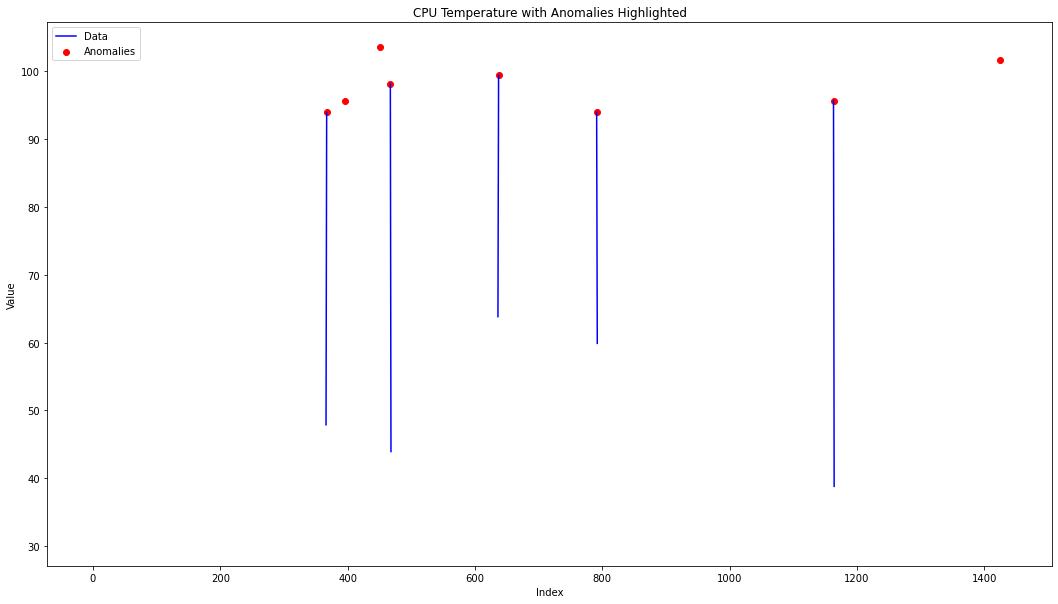

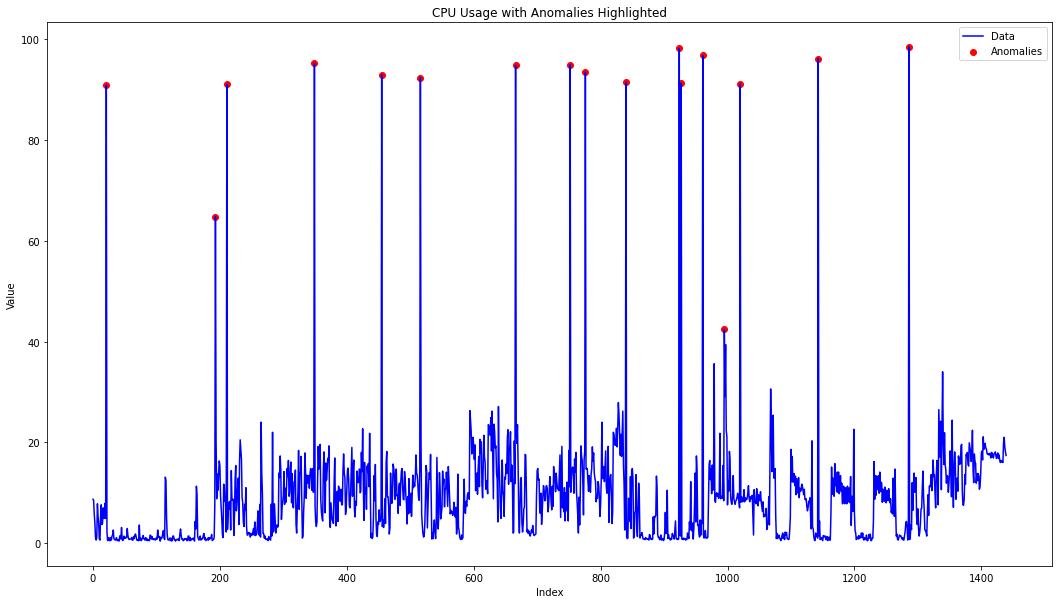

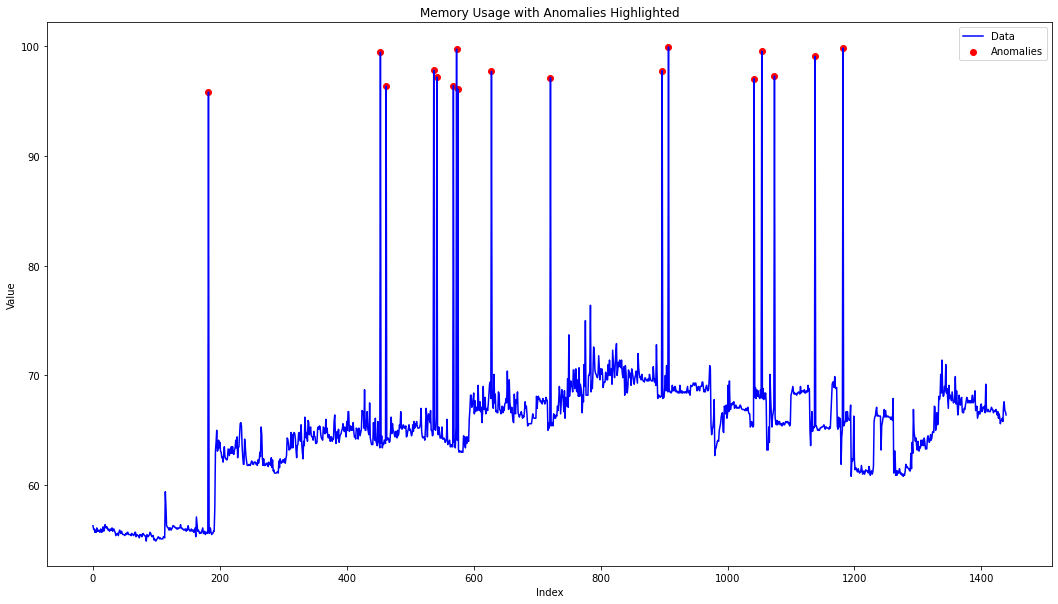

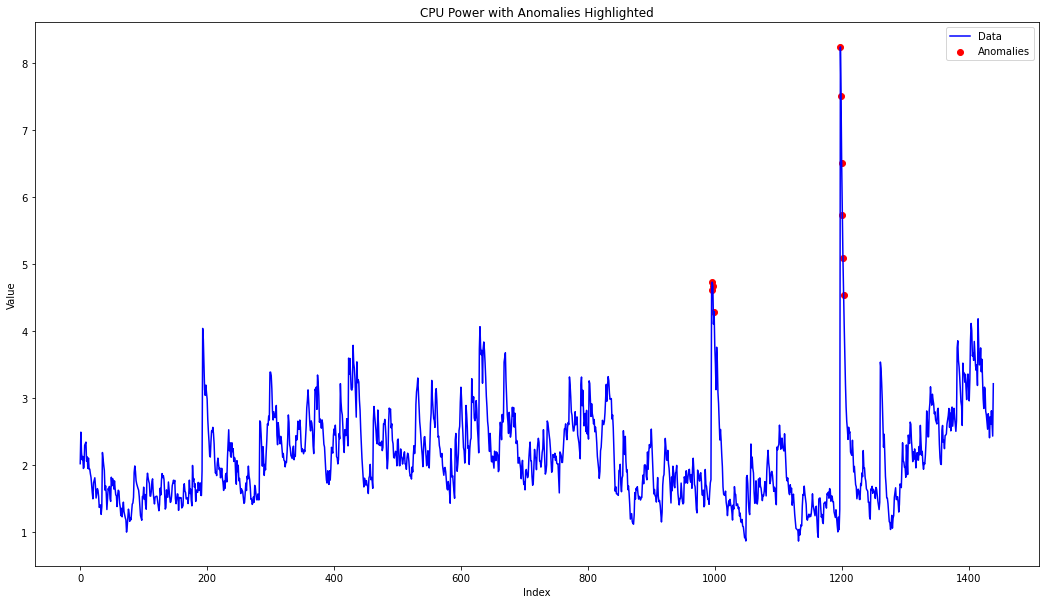

In [15]:
import matplotlib.pyplot as plt
def plot_with_anomalies(x, y, anomalies, title, xlabel="Index", ylabel="Value"):
    plt.figure(figsize=(18, 10))
    plt.plot(x, y, label="Data", color="blue")
    plt.scatter(x[anomalies], y[anomalies], color="red", label="Anomalies")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Visualize each metric
plot_with_anomalies(df.index, df["cpu_temperature"], df["CPU_Temperature_Anomaly"], 
                    "CPU Temperature with Anomalies Highlighted")
plot_with_anomalies(df.index, df["cpu_usage"], df["CPU_Usage_Anomaly"], 
                    "CPU Usage with Anomalies Highlighted")
plot_with_anomalies(df.index, df["memory_usage"], df["Memory_Usage_Anomaly"], 
                    "Memory Usage with Anomalies Highlighted")
plot_with_anomalies(df.index, df["cpu_load"], df["CPU_Load_Anomaly"], 
                    "CPU Power with Anomalies Highlighted")